In [2]:
from slepy import SLECalculator
from pathlib import Path
import matplotlib.pyplot as plt
import xarray as xr

In [38]:
ensemble = Path('/Users/jonniebarnsley/Downloads/ssp534-over/0lev')
with SLECalculator(parallel=True) as calc:
    sle534 = calc.process_ensemble(ensemble)

Loading ensemble data:
    Run 1/16: AIS_ssp534-over_p001_8km_2007-2300
    Run 2/16: AIS_ssp534-over_p002_8km_2007-2300
    Run 3/16: AIS_ssp534-over_p003_8km_2007-2300
    Run 4/16: AIS_ssp534-over_p004_8km_2007-2300
    Run 5/16: AIS_ssp534-over_p005_8km_2007-2300
    Run 6/16: AIS_ssp534-over_p006_8km_2007-2300
    Run 7/16: AIS_ssp534-over_p007_8km_2007-2300
    Run 8/16: AIS_ssp534-over_p008_8km_2007-2300
    Run 9/16: AIS_ssp534-over_p009_8km_2007-2300
    Run 10/16: AIS_ssp534-over_p010_8km_2007-2300
    Run 11/16: AIS_ssp534-over_p011_8km_2007-2300
    Run 12/16: AIS_ssp534-over_p012_8km_2007-2300
    Run 13/16: AIS_ssp534-over_p013_8km_2007-2300
    Run 14/16: AIS_ssp534-over_p014_8km_2007-2300
    Run 15/16: AIS_ssp534-over_p015_8km_2007-2300
    Run 16/16: AIS_ssp534-over_p016_8km_2007-2300
DatetimeIndex([], dtype='datetime64[ns]', freq=None)
Calculating sea level equivalent...
📊 Dask dashboard: http://127.0.0.1:8787/status
Completed processing 16 ensemble runs


In [39]:
sle534.to_netcdf('/Users/jonniebarnsley/Downloads/ssp534-over/ssp534-over_sle.nc')

NameError: name 'sle534' is not defined

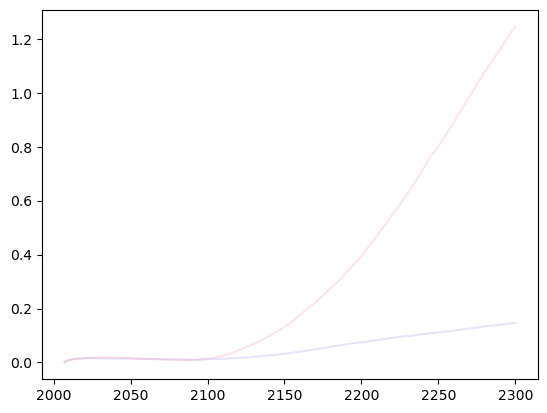

In [3]:
ssp126 = xr.open_dataset('/Users/jonniebarnsley/Downloads/ssp126_sle.nc')
ssp585 = xr.open_dataset('/Users/jonniebarnsley/Downloads/ssp585_sle.nc')
for run in ssp126.run:
    sle126 = ssp126.sle.sel(run=run)
    sle585 = ssp585.sle.sel(run=run)
    plt.plot(sle126.time, sle126, color='blue', alpha=0.1)
    plt.plot(sle585.time, sle585, color='red', alpha=0.1)
    plt.plot(sle534.time, sle534.sel(run=run), color='green', alpha=0.1)

plt.title('SSP1-2.6 Sea Level Contribution from AIS Ensemble Members')
plt.xlabel('Year')
plt.ylabel('Sea Level Contribution (m)')

In [4]:
smb = Path('/Users/jonniebarnsley/Downloads/smb')
smb126_path = smb / 'ssp126' / 'CESM2-WACCM'
smb585_path = smb / 'ssp585' / 'CESM2-WACCM'
smb534_path = smb / 'ssp534-over' / 'CESM2-WACCM'

smb126 = xr.concat(
    [xr.open_dataset(f) for f in sorted(smb126_path.glob('*.nc'))], dim='time'
)
smb126 = smb126.assign_coords(time=range(1995, 2301))
smb585 = xr.concat(
    [xr.open_dataset(f) for f in sorted(smb585_path.glob('*.nc'))], dim='time'
)
smb585 = smb585.assign_coords(time=range(1995, 2301))
smb534 = xr.concat(
    [xr.open_dataset(f) for f in sorted(smb534_path.glob('*.nc'))], dim='time'
)
smb534 = smb534.assign_coords(time=range(1995, 2301))

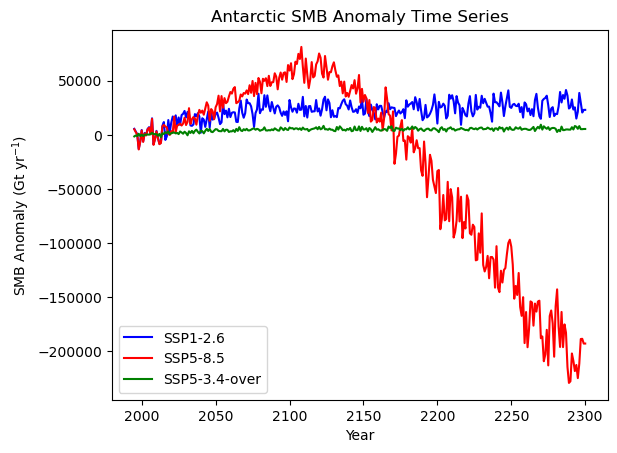

In [5]:
smb585_ts = smb585.smb_anomaly.sum(dim=['x', 'y'])
smb126_ts = smb126.smb_anomaly.sum(dim=['x', 'y'])
smb534_ts = smb534.smb_anomaly.sum(dim=['x', 'y'])

plt.plot(smb126_ts.time, smb126_ts, label='SSP1-2.6', color='blue')
plt.plot(smb585_ts.time, smb585_ts, label='SSP5-8.5', color='red')
plt.plot(smb534_ts.time, smb534_ts, label='SSP5-3.4-over', color='green')
plt.title('Antarctic SMB Anomaly Time Series')
plt.xlabel('Year')
plt.ylabel('SMB Anomaly (Gt yr$^{-1}$)')
plt.legend()

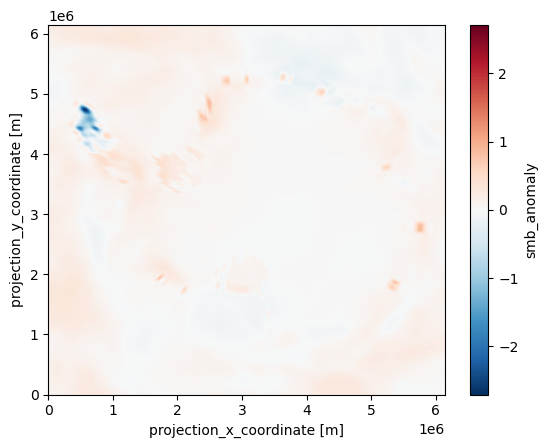

In [65]:
ssp534 = xr.open_dataset('/Users/jonniebarnsley/Downloads/smb/ssp126/CESM2-WACCM/'+\
                         'smb_anomaly_CESM2-WACCM_ssp126_2100.nc')
ssp534.smb_anomaly.plot()

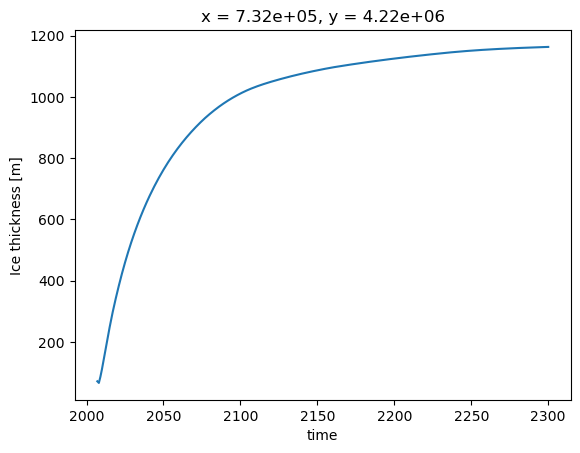

In [33]:
file = xr.open_dataset('/Users/jonniebarnsley/Downloads/ssp534-over/0lev/AIS_ssp534-over_p001_8km_2007-2300.nc')
file.sel(x=coords['x'], y=coords['y'], method='nearest').thickness.plot()

In [12]:
dthk = file.thickness.isel(time=-1) - file.thickness.isel(time=0)
dthk.max()

<xarray.DataArray 'thickness' ()> Size: 8B
array(1092.27)

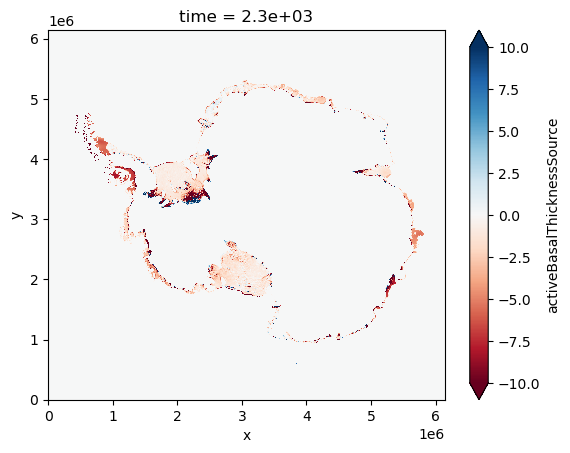

In [29]:
file.activeBasalThicknessSource.sel(time=2300).plot(vmax=10, vmin=-10, cmap='RdBu')

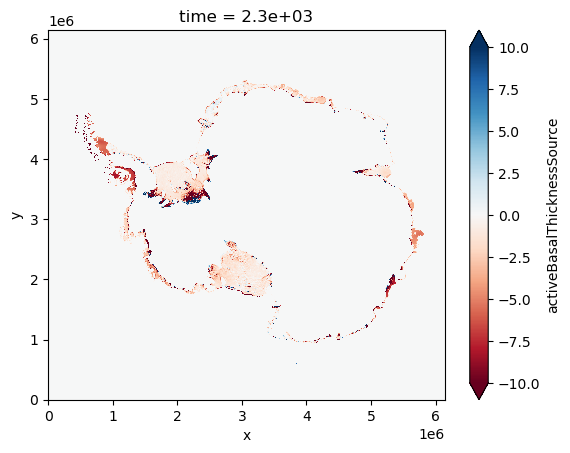

In [28]:
file = xr.open_dataset('/Users/jonniebarnsley/Downloads/ssp126/0lev/AIS_ssp126_p001_8km_2007-2300.nc')
file.activeBasalThicknessSource.sel(time=2300).plot(vmax=10, vmin=-10, cmap='RdBu')

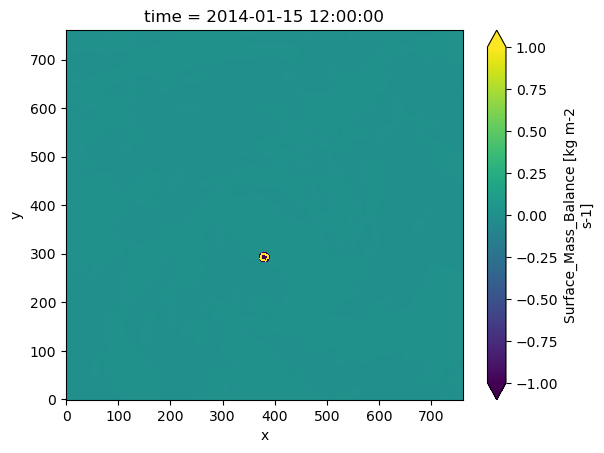

In [75]:
file = xr.open_dataset('/Users/jonniebarnsley/Downloads/CESM_anomaly_testout.nc')
file.smb_anomaly.isel(time=-1).plot(vmax=1, vmin=-1)

In [69]:
ts = file.smb_anomaly.mean(dim=['x', 'y'])

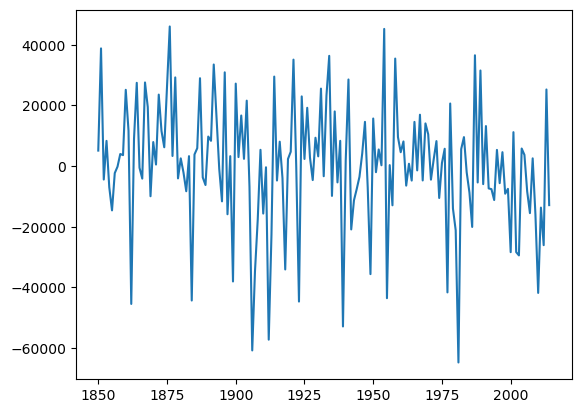

In [73]:
plt.plot(range(1850, 2015), ts)